<a href="https://colab.research.google.com/github/ejini6969/Optimization-Deep-Learning-ODL-/blob/main/ANN_boston_(Lecture_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("drive")

Mounted at drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
path = '/content/drive/MyDrive/boston.csv'

In [4]:
data = pd.read_csv(path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
Y = data["PRICE"]
X = data.drop("PRICE", axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (404, 13)
y_train shape (404,)
X_test shape (102, 13)
y_test shape (102,)


In [7]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

## Initial Model

In [9]:
# building the sequential model

L1 = 100 # number of neurons / hidden layers (Randomly assigned)
L2 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu')) # input_dim based on number of feature variables
model.add(Dense(L2, activation = 'relu')) 

# Output layer
model.add(Dense(1, activation = "linear")) # output is binary variable (0 / 1) (prefer sigmoid), unless multi-class target variables which is dependent on the final number (prefer softmax)
# put 1 when target variable is binary or continuous 

In [10]:
# compiling the sequential model
model.compile(loss = "mse", metrics = ["mae"], optimizer = "rmsprop")

In [11]:
# training the model for 10 epochs
history = model.fit(X_train, y_train, epochs = 10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 84ms/step - loss: 572.1163 - mae: 22.0725 - val_loss: 516.1045 - val_mae: 20.8412
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 517.0381 - mae: 20.8399 - val_loss: 471.5744 - val_mae: 19.7193
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 468.7063 - mae: 19.6714 - val_loss: 422.2626 - val_mae: 18.4645
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 412.4774 - mae: 18.3402 - val_loss: 369.2318 - val_mae: 17.0380
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 354.2788 - mae: 16.8106 - val_loss: 313.3545 - val_mae: 15.4450
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 292.4124 - mae: 15.0880 - val_loss: 264.7177 - val_mae: 13.8638
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 239.3315 - mae: 13.4124 - val_loss: 222.9604 - val_mae: 12.3480
Epoch 8/10
5/5 [==============================] - 0s 19

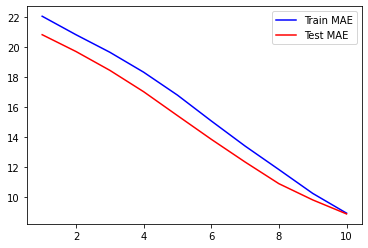

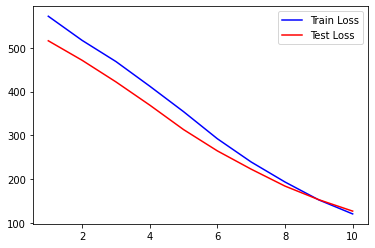

In [12]:
import matplotlib.pyplot as plt

acc2 = history.history['mae']
val_acc = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'b', label = 'Train MAE')
plt.plot(epochs, val_acc, 'r', label = 'Test MAE')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()

## EXERCISE

Add more hidden layers with different number of neurons in the model building, you may use different activation function to improve the performance.

In [13]:
L1=100
L2=100
L3=100

model1 = Sequential()
model1.add(Dense(L1,input_dim=13,activation='relu')) #input dimension based on feature variables
model1.add(Dense(L2,activation='relu'))
model1.add(Dense(L3,activation='relu'))

#output layer
model1.add(Dense(1,activation='linear')) #continuous target variable

#Compiling the sequential model
model1.compile(loss='mse',metrics=['mae'],optimizer='rmsprop') #root mean square propagation

history = model1.fit(X_train, y_train, epochs = 20, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/20
5/5 [==============================] - 2s 74ms/step - loss: 570.2633 - mae: 22.0351 - val_loss: 479.9247 - val_mae: 20.0427
Epoch 2/20
5/5 [==============================] - 0s 19ms/step - loss: 460.0970 - mae: 19.5218 - val_loss: 362.7725 - val_mae: 16.9893
Epoch 3/20
5/5 [==============================] - 0s 42ms/step - loss: 328.4560 - mae: 16.0451 - val_loss: 226.5146 - val_mae: 12.8486
Epoch 4/20
5/5 [==============================] - 0s 43ms/step - loss: 186.9545 - mae: 11.5405 - val_loss: 122.7172 - val_mae: 8.5826
Epoch 5/20
5/5 [==============================] - 0s 34ms/step - loss: 91.3584 - mae: 7.6190 - val_loss: 80.8478 - val_mae: 6.6436
Epoch 6/20
5/5 [==============================] - 0s 46ms/step - loss: 54.8548 - mae: 5.6452 - val_loss: 65.4858 - val_mae: 5.7519
Epoch 7/20
5/5 [==============================] - 0s 29ms/step - loss: 41.4050 - mae: 4.8062 - val_loss: 58.6775 - val_mae: 5.4775
Epoch 8/20
5/5 [==============================] - 0s 23ms/step - los